# Financial Statement IDX Stocks


In [2]:

import os
import gc
import re
import tqdm
import copy
%matplotlib inline
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.image as mpimg
from IPython.display import display_html
from dask.distributed import Client, wait
import warnings; warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
sns.set_context("poster", font_scale = 0.6,rc = {"grid.linewidth": 0.4})
sns.set_style({'font.family':'serif'})


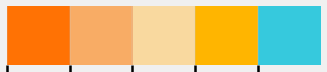

In [3]:

# Color Palette
custom_colors = ['#ff7204', '#f8ac65', '#f9d99f', '#ffb500', '#36c9dd']
sns.palplot(sns.color_palette(custom_colors))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

# Set tick size
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)


# Utility Functions

In [4]:

def barplot_features(df, feature, title, palette = custom_colors[2:]):
    '''Takes the numerical columns and plots the barplot.'''

    # We need to extract both the name of the category and the no. of appearences
    index = df[feature].value_counts().reset_index()["index"].values
    values = df[feature].value_counts().reset_index()[feature].values 

    plt.figure(figsize = (18, 3))
    sns.barplot(x = index, y = values, palette = palette)
    plt.title(title, fontsize=15)
    plt.show();

    del index, values
    gc.collect()


In [5]:

def distplot_features(df, feature, title, color = custom_colors[4], categorical=True):
    '''Takes a column from the dataframe and plots the distribution (after count)'''

    if categorical: values = df[feature].value_counts().values
    else: values = df[feature].values

    print('Mean: {:,}'.format(np.mean(values)), "\n"
          'Median: {:,}'.format(np.median(values)), "\n"
          'Max: {:,}'.format(np.max(values)))

    plt.figure(figsize = (18, 3))

    if categorical: sns.distplot(values, hist=False, color = color, kde_kws = {'lw':3})
    else:
        # To speed up the process
        if len(values) > 1000000: sns.distplot(values[::250000], hist=False, color = color, kde_kws = {'lw':3})
        else: sns.distplot(values, hist=False, color = color, kde_kws = {'lw':3})

    plt.title(title, fontsize=15)
    plt.show()    
    del values
    gc.collect()


In [6]:
df_annual = pd.read_csv('../input/financial-statement-idx-stocks/annual.csv', names = ['symbol', 'account', 'type', '2018_12_31', '2019_12_31', '2020_12_31', '2021_12_31'], header = 0)

# Data Information
print("Rows: {:,}".format(len(df_annual)), "\n" + "Columns: {}".format(len(df_annual.columns)))

# Find Missing Data if any
for column in df_annual.columns:
    if df_annual[column].isna().sum() != 0:
        print("{} has: {:,} ({:.2}%) missing values.".format(column, df_annual[column].isna().sum(), (df_annual[column].isna().sum()/len(df_annual))*100))       

# Fill in missing values with "-1"

df_annual['type'] = df_annual['type'].fillna(-1)
df_annual['2018_12_31'] = df_annual['2018_12_31'].fillna(-1)
df_annual['2019_12_31'] = df_annual['2019_12_31'].fillna(-1)
df_annual['2020_12_31'] = df_annual['2020_12_31'].fillna(-1)
df_annual['2021_12_31'] = df_annual['2021_12_31'].fillna(-1)


Rows: 211,505 
Columns: 7
type has: 542 (0.26%) missing values.
2018_12_31 has: 152,841 (7.2e+01%) missing values.
2019_12_31 has: 152,870 (7.2e+01%) missing values.
2020_12_31 has: 153,200 (7.2e+01%) missing values.
2021_12_31 has: 155,445 (7.3e+01%) missing values.


### Peaking into the data

In [7]:
df_annual.head().style.background_gradient(cmap = "Oranges")

,symbol,account,type,2018_12_31,2019_12_31,2020_12_31,2021_12_31
0,AALI,BS,Cash Financial,49082000000.000000,260446000000.000000,107246000000.000000,131675000000.000000
1,AALI,BS,Net Tangible Assets,18933678000000.000000,18465202000000.000000,18696542000000.000000,20563241000000.000000
2,AALI,BS,Long Term Debt,3606303000000.000000,5535466000000.000000,5623933000000.000000,2131944000000.000000
3,AALI,BS,Invested Capital,23720932000000.000000,24206619000000.000000,24376426000000.000000,26315597000000.000000
4,AALI,BS,Total Assets,26856967000000.000000,26974124000000.000000,27781231000000.000000,30399906000000.000000


### Discrpitive Statistics

In [8]:
df_annual.describe().T.style.background_gradient(cmap = "Oranges")

,count,mean,std,min,25%,50%,75%,max
2018_12_31,211505.000000,413455132600.705933,9957842936466.546875,-243634782000000.000000,-1.000000,-1.000000,-1.000000,1296898292000000.000000
2019_12_31,211505.000000,447749350833.434387,10857135187459.130859,-325230288000000.000000,-1.000000,-1.000000,-1.000000,1416758840000000.000000
2020_12_31,211505.000000,469484917695.552246,11671010386425.837891,-376828159000000.000000,-1.000000,-1.000000,-1.000000,1511804628000000.000000
2021_12_31,211505.000000,542112404127.017578,13314255501644.492188,-484615856000000.000000,-1.000000,-1.000000,-1.000000,1725611128000000.000000


### Correlation Matrix

In [9]:
df_annual.corr().style.background_gradient(cmap = "Oranges")

,2018_12_31,2019_12_31,2020_12_31,2021_12_31
2018_12_31,1.000000,0.991680,0.979506,0.965368
2019_12_31,0.991680,1.000000,0.983763,0.969727
2020_12_31,0.979506,0.983763,1.000000,0.983341
2021_12_31,0.965368,0.969727,0.983341,1.000000


## Inspect the columns
- **categorical features (barplot):**`account`
- **numerical features (distplot):** `2019_12_31`, `2020_12_31`, `2018_12_31`, `2021_12_31`
- **categorical features (distplot):** `type`, `symbol`

### Inspect Numerical Features

Mean: 447,749,350,833.4344 
Median: -1.0 
Max: 1,416,758,840,000,000.0


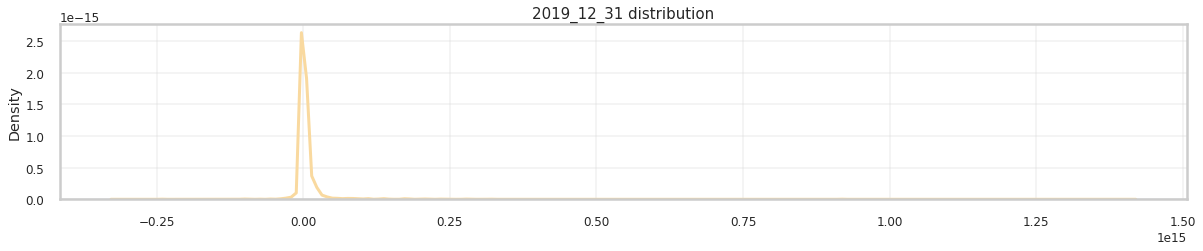

Mean: 469,484,917,695.55225 
Median: -1.0 
Max: 1,511,804,628,000,000.0


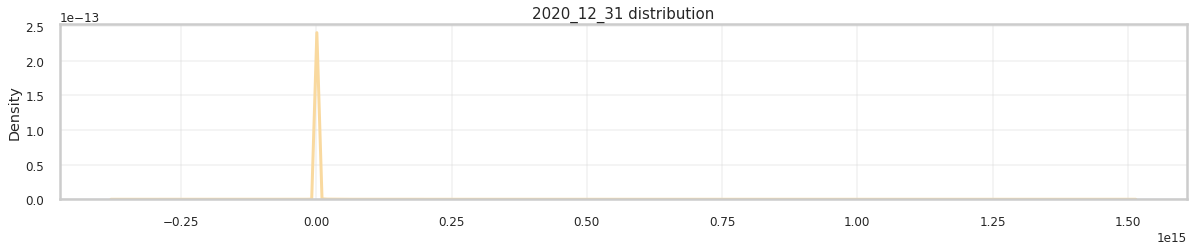

Mean: 413,455,132,600.70593 
Median: -1.0 
Max: 1,296,898,292,000,000.0


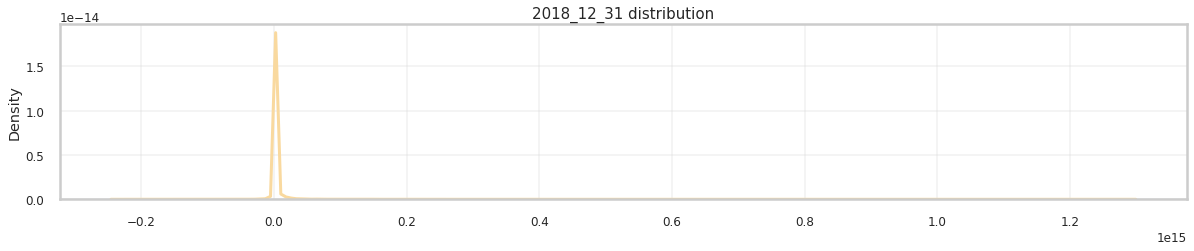

Mean: 542,112,404,127.0176 
Median: -1.0 
Max: 1,725,611,128,000,000.0


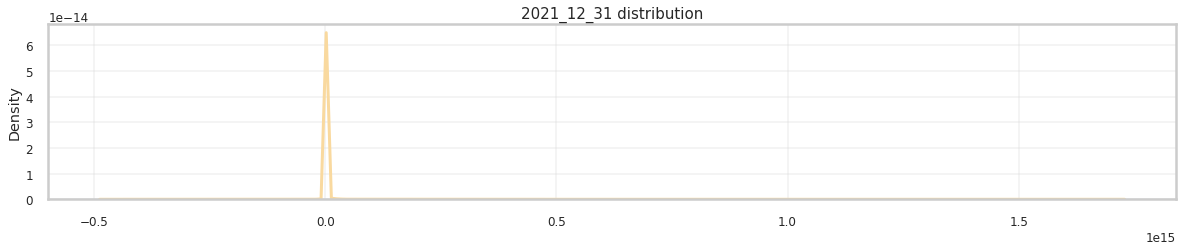

In [10]:

numerical_features = ['2019_12_31', '2020_12_31', '2018_12_31', '2021_12_31']

for feature in numerical_features:
    distplot_features(df_annual, feature=feature, title = feature + " distribution", color = custom_colors[2], categorical=False)


### Inspect Categorical Features

Mean: 543.7146529562982 
Median: 541.0 
Max: 1,082


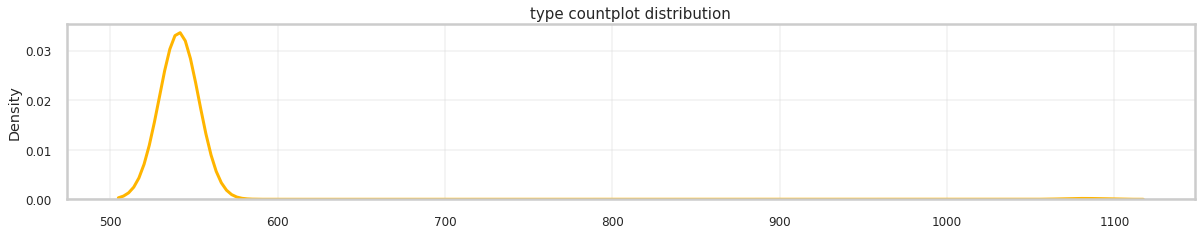

Mean: 388.08256880733944 
Median: 391.0 
Max: 391


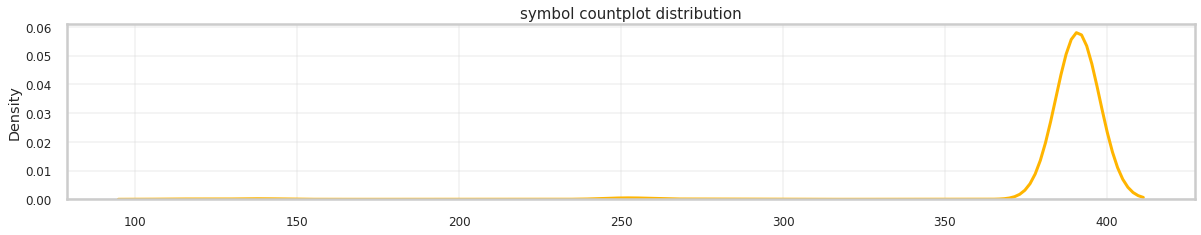

In [11]:

categorical_features = ['type', 'symbol'] 

for feature in categorical_features:
    distplot_features(df_annual, feature=feature, title = feature + " countplot distribution", color = custom_colors[3], categorical=True)


### Inspect Low Cardinality Categorical Features

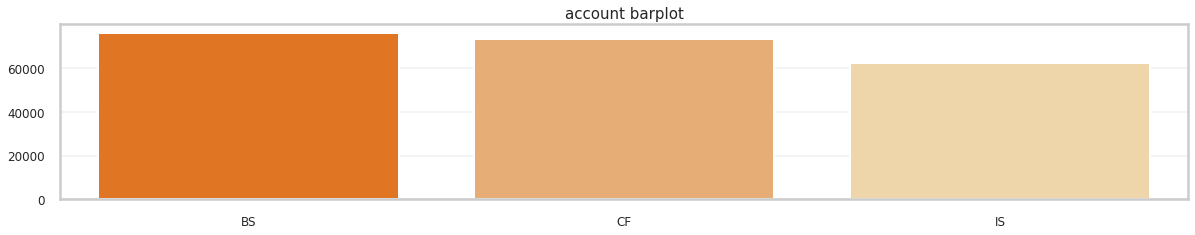

In [12]:

categorical_for_bar = ['account']
for feature in categorical_for_bar:
    barplot_features(df_annual, feature=feature, title = feature + " barplot", palette = custom_colors)


In [13]:
df_quarter = pd.read_csv('../input/financial-statement-idx-stocks/quarter.csv', names = ['symbol', 'account', 'type', '2021_09_30', '2021_12_31', '2022_03_31', '2022_06_30', '2022_09_30'], header = 0)

# Data Information
print("Rows: {:,}".format(len(df_quarter)), "\n" + "Columns: {}".format(len(df_quarter.columns)))

# Find Missing Data if any
for column in df_quarter.columns:
    if df_quarter[column].isna().sum() != 0:
        print("{} has: {:,} ({:.2}%) missing values.".format(column, df_quarter[column].isna().sum(), (df_quarter[column].isna().sum()/len(df_quarter))*100))       

# Fill in missing values with "-1"

df_quarter['type'] = df_quarter['type'].fillna(-1)
df_quarter['2021_09_30'] = df_quarter['2021_09_30'].fillna(-1)
df_quarter['2021_12_31'] = df_quarter['2021_12_31'].fillna(-1)
df_quarter['2022_03_31'] = df_quarter['2022_03_31'].fillna(-1)
df_quarter['2022_06_30'] = df_quarter['2022_06_30'].fillna(-1)
df_quarter['2022_09_30'] = df_quarter['2022_09_30'].fillna(-1)


Rows: 208,691 
Columns: 8
type has: 542 (0.26%) missing values.
2021_09_30 has: 156,969 (7.5e+01%) missing values.
2021_12_31 has: 157,153 (7.5e+01%) missing values.
2022_03_31 has: 155,242 (7.4e+01%) missing values.
2022_06_30 has: 158,316 (7.6e+01%) missing values.
2022_09_30 has: 191,678 (9.2e+01%) missing values.


### Peaking into the data

In [14]:
df_quarter.head().style.background_gradient(cmap = "Oranges")

,symbol,account,type,2021_09_30,2021_12_31,2022_03_31,2022_06_30,2022_09_30
0,AALI,BS,Long Term Equity Investment,323520000000.000000,330904000000.000000,327580000000.000000,285069000000.000000,471463000000.000000
1,AALI,BS,Additional Paid In Capital,3878995000000.000000,3878995000000.000000,3878995000000.000000,3878995000000.000000,3878995000000.000000
2,AALI,BS,Long Term Debt,5709887000000.000000,2131944000000.000000,2144732000000.000000,2220370000000.000000,3281008000000.000000
3,AALI,BS,Ordinary Shares Number,1924688333.000000,1924688333.000000,1924688333.000000,1924688333.000000,1924688333.000000
4,AALI,BS,Total Assets,29694011000000.000000,30399906000000.000000,31232777000000.000000,30233993000000.000000,32638650000000.000000


### Discrpitive Statistics

In [15]:
df_quarter.describe().T.style.background_gradient(cmap = "Oranges")

,count,mean,std,min,25%,50%,75%,max
2021_09_30,208691.000000,475407541208.155762,12373373337524.767578,-175313000000000.000000,-1.000000,-1.000000,-1.000000,1637950171000000.000000
2021_12_31,208691.000000,504400456256.033875,13003131678252.183594,-438813037000000.000000,-1.000000,-1.000000,-1.000000,1725611128000000.000000
2022_03_31,208691.000000,496926086344.076660,12975608520764.052734,-223695701000000.000000,-1.000000,-1.000000,-1.000000,1734074740000000.000000
2022_06_30,208691.000000,516386950793.126709,13216244168917.128906,-194169000000000.000000,-1.000000,-1.000000,-1.000000,1785706841000000.000000
2022_09_30,208691.000000,273855194832.676239,9671524174969.433594,-197134246000000.000000,-1.000000,-1.000000,-1.000000,1839336498000000.000000


### Correlation Matrix

In [16]:
df_quarter.corr().style.background_gradient(cmap = "Oranges")

,2021_09_30,2021_12_31,2022_03_31,2022_06_30,2022_09_30
2021_09_30,1.000000,0.991763,0.994912,0.992244,0.706814
2021_12_31,0.991763,1.000000,0.990781,0.989919,0.713936
2022_03_31,0.994912,0.990781,1.000000,0.991237,0.709364
2022_06_30,0.992244,0.989919,0.991237,1.000000,0.715875
2022_09_30,0.706814,0.713936,0.709364,0.715875,1.000000


## Inspect the columns
- **categorical features (barplot):**`account`
- **numerical features (distplot):** `2022_09_30`, `2021_09_30`, `2022_06_30`, `2022_03_31`, `2021_12_31`
- **categorical features (distplot):** `type`, `symbol`

### Inspect Numerical Features

Mean: 273,855,194,832.67624 
Median: -1.0 
Max: 1,839,336,498,000,000.0


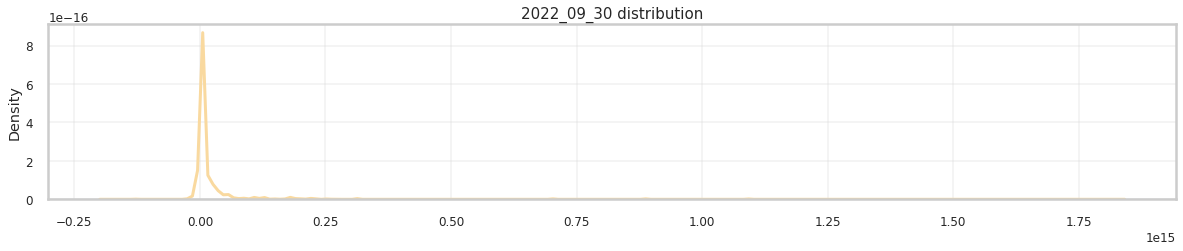

Mean: 475,407,541,208.15576 
Median: -1.0 
Max: 1,637,950,171,000,000.0


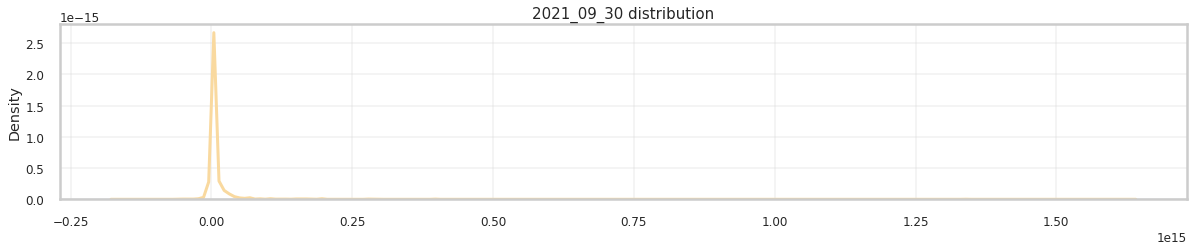

Mean: 516,386,950,793.1267 
Median: -1.0 
Max: 1,785,706,841,000,000.0


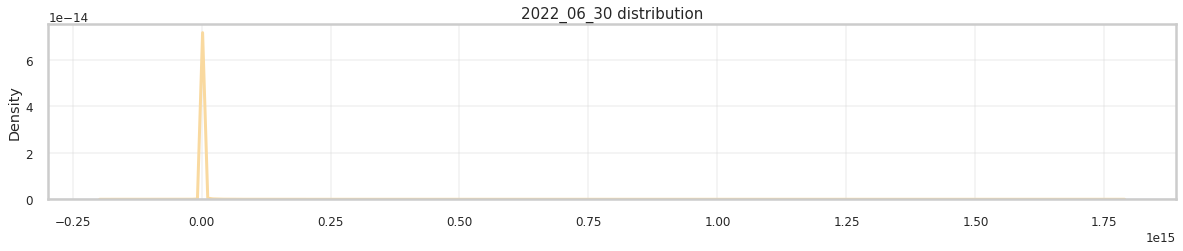

Mean: 496,926,086,344.07666 
Median: -1.0 
Max: 1,734,074,740,000,000.0


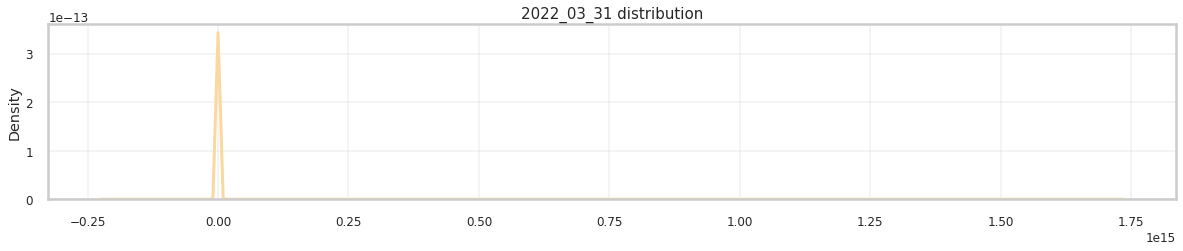

Mean: 504,400,456,256.0339 
Median: -1.0 
Max: 1,725,611,128,000,000.0


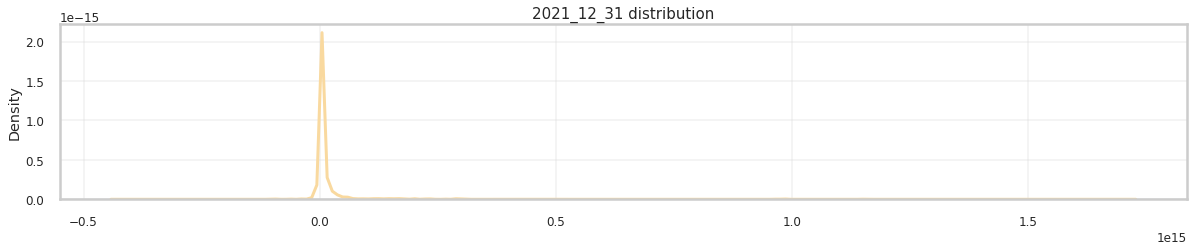

In [17]:

numerical_features = ['2022_09_30', '2021_09_30', '2022_06_30', '2022_03_31', '2021_12_31']

for feature in numerical_features:
    distplot_features(df_quarter, feature=feature, title = feature + " distribution", color = custom_colors[2], categorical=False)


### Inspect Categorical Features

Mean: 536.4807197943445 
Median: 540.0 
Max: 1,080


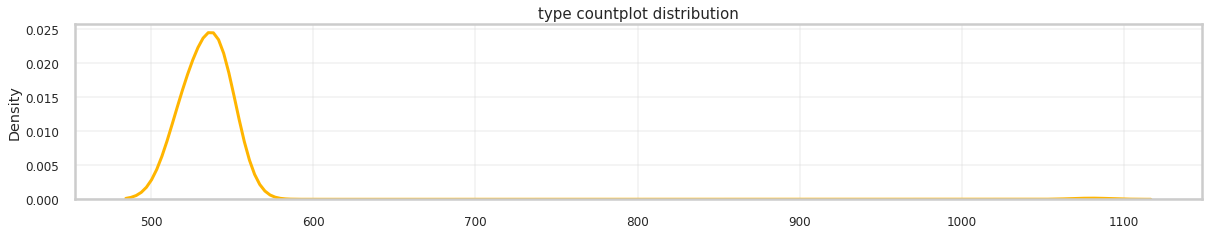

Mean: 383.62316176470586 
Median: 391.0 
Max: 391


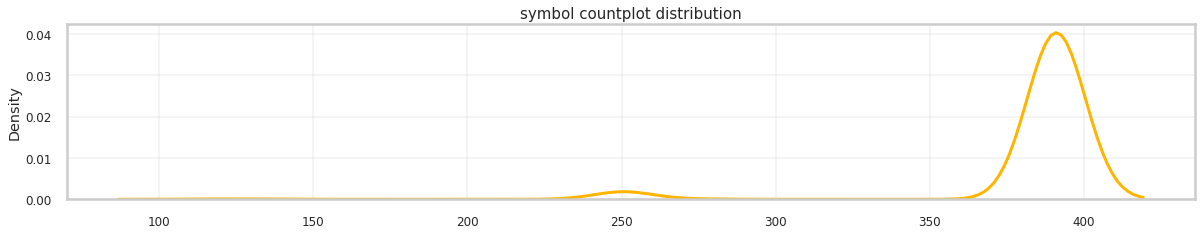

In [18]:

categorical_features = ['type', 'symbol'] 

for feature in categorical_features:
    distplot_features(df_quarter, feature=feature, title = feature + " countplot distribution", color = custom_colors[3], categorical=True)


### Inspect Low Cardinality Categorical Features

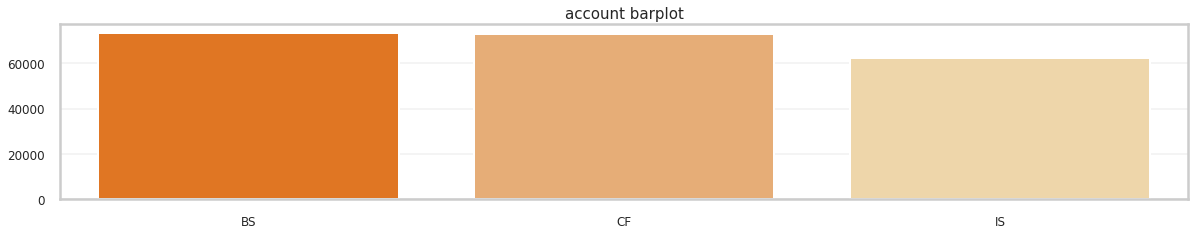

In [19]:

categorical_for_bar = ['account']
for feature in categorical_for_bar:
    barplot_features(df_quarter, feature=feature, title = feature + " barplot", palette = custom_colors)
